In [1]:
] activate .

In [2]:
using Revise
includet("isokann.jl")

In [160]:
includet("neurcomm.jl")
process = NN.Triplewell(10)
trajs = NN.sampletrajectories(process, 100, 5, dt=.001, steps=10)

2×6×100 Array{Float64, 3}:
[:, :, 1] =
 -2.56837   -2.53636   -2.50256   -2.44164   -2.31234   -2.31362
 -0.430226  -0.404761  -0.406229  -0.388868  -0.335888  -0.352046

[:, :, 2] =
 -1.02034  -1.02109  -1.10726  -1.11443  -1.15765  -1.17609
  1.36113   1.38031   1.37263   1.3527    1.275     1.21209

[:, :, 3] =
 -1.22456    -1.18135     -1.18498    -1.21443    -1.25454    -1.25011
 -0.0408106   0.00146814   0.0560119   0.0660163   0.0372946   0.0354529

...

[:, :, 98] =
 -1.18933   -1.13032   -1.21651   -1.25545  -1.21224   -1.20957
 -0.173255  -0.192143  -0.191848  -0.26882  -0.285358  -0.362555

[:, :, 99] =
 -1.0774    -1.03557   -1.14079   -1.14483   -1.09784   -1.05072
  0.288696   0.329264   0.243631   0.257488   0.207934   0.200972

[:, :, 100] =
 -2.89851   -2.75991   -2.7253    -2.63657   -2.63072   -2.6182
  0.488165   0.444645   0.399087   0.336235   0.360165   0.398997

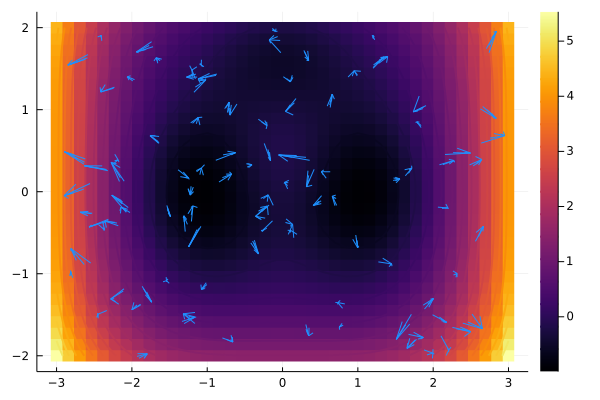

In [191]:
NN.plot(process.potential, process.box)
NN.plottrajs(trajs)

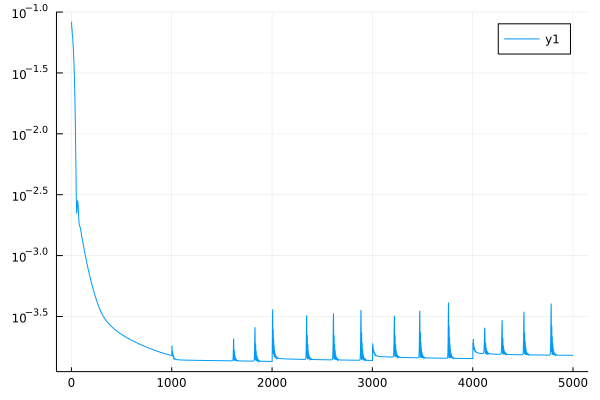

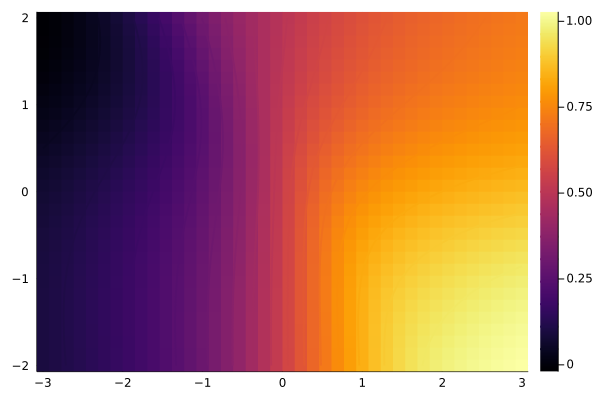

In [195]:
model, loss = isokann(data=trajs, iter=1000, poweriter=5, opt=ADAM(0.01), model=mlp([5,5,5]))
plot(loss, yaxis=:log) |> display
NN.plot(model, process.box)

In [185]:
testdata = NN.sampletrajectories(process, 1000, 100, dt=.001, steps=10)
fixedpointloss(model, testdata)

0.004148628960068389

In [186]:
ys = trajs[:,2:end,:]
xs = trajs[:,1,:]
residual = koopmanexpectation(ys, model) - model(xs)

100-element Vector{Float64}:
 -0.014770659557005072
  0.018762682608969627
 -0.010048905667375041
 -0.004025918583346388
  0.017097324762324728
 -0.001196388448328145
 -0.02867708920183848
 -0.012510294538738753
  0.0034385636467664377
 -0.017895503456354767
 -0.024444633756652956
  0.001481853269381106
 -0.022171112211203978
  ⋮
  0.007459694631160696
 -0.015040323780987297
 -0.047621162174847353
  0.0028216677633580434
 -0.0033774342985107286
 -0.028507226179442846
 -0.019418663336532527
 -0.0007543576769116767
 -0.005361612146956851
  0.01312089917390058
  0.0079344466679091
 -0.0021154799842149075

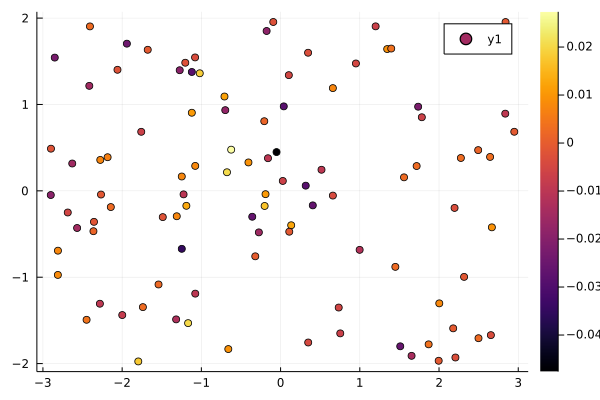

In [187]:
scatter(xs[1,:], xs[2,:], marker_z=residual)

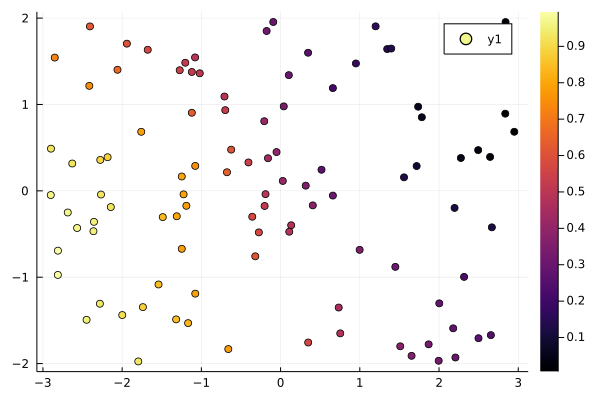

In [193]:
scatter(xs[1,:], xs[2,:], marker_z=model(xs))